In [94]:
# import alle libraries
import pandas as pd 
import plotly.express as px 
import plotly.graph_objects as go

In [5]:
data = pd.read_csv('Transfers.csv')

data.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


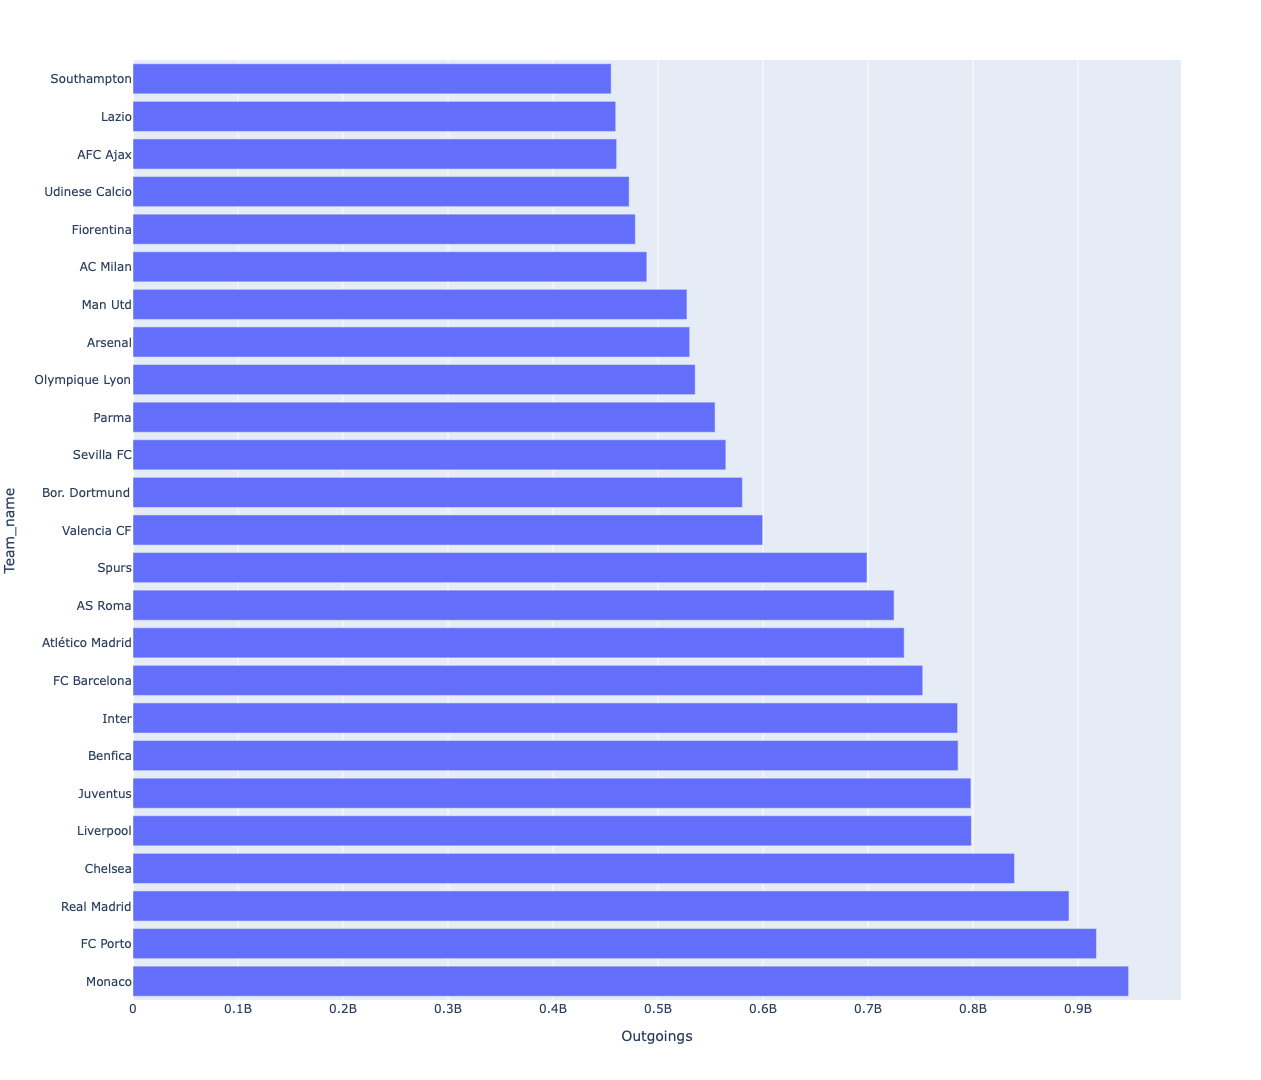

In [137]:
teams = data['Team_from'].unique()

df_teams = pd.DataFrame({'Team_name': [], 'Outgoings': []})

# data[data['Team_from'] == 'Arsenal'].Transfer_fee.sum()

for team in teams:
    team = team
    temp_out = data[data['Team_from']== team].Transfer_fee.sum()
    #print(temp_out)
    df_temp = pd.DataFrame({'Team_name': [team], 'Outgoings': [temp_out]})
    df_teams = df_teams.append(df_temp)

df_teams = df_teams.sort_values(by='Outgoings', ascending = False)

df_teams['Outgoings'] = df_teams['Outgoings'].astype(int)


fig = px.bar(df_teams.head(25), x = 'Outgoings', y = 'Team_name', orientation = 'h', height = 1080, width = 1080)
fig.show()

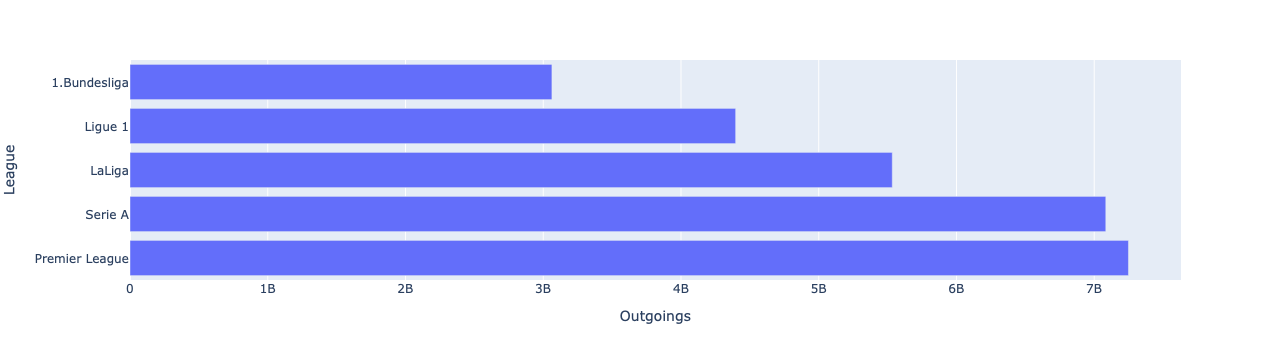

In [159]:
leagues = data['League_to'].unique()

df_leagues = pd.DataFrame({'League': [], 'Outgoings':[]})

for league in leagues:
    temp_out = data[data['League_from']==league].Transfer_fee.sum()
    df_temp = pd.DataFrame({'League': [league], 'Outgoings': [temp_out]})
    df_leagues = df_leagues.append(df_temp)
    
df_leagues = df_leagues.sort_values(by='Outgoings', ascending = False)

fig = px.bar(df_leagues.head(), x = 'Outgoings', y = 'League')
fig.show()